<a href="https://colab.research.google.com/github/DaniilAszn/ML2_course/blob/main/3_%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3 практика по NN by RTU MIREA**

### Задание 1: Рассчитать результат свертки:

Ответ указать в виде: (Ch_out, H_out, W_out)

$W_{out} = \frac{W_{in} - K + 2 \cdot P}{S} + 1$

$H_{out} = \frac{H_{in} - K + 2 \cdot P}{S} + 1$

1.1:Размер входного изображения: 1024 x 1024. Какого размера получится
результат свёртки 5 x 5, со страйдом (1, 1), с паддингом (1, 1), если на
выходе должно быть 44 каналов.

Дано:
* $W_{in} = 1024$
* $K = 5$
* $S = 1$
* $P = 1$
* $Ch_{out} = 44$

Решение:
$\frac{1024 - 5 + 2 \cdot 1}{1} + 1 = 1022$

Ответ:
$(44, 1022, 1022)$

1.2: Размер входного изображения: 128 x 128. Какого размера получится
результат свёртки 9 x 9 со страйдом (1, 1), с паддингом (1, 1), если на
выходе должно быть 9 каналов.

Дано:
* $W_{in} = 128$
* $K = 9$
* $S = 1$
* $P = 1$
* $Ch_{out} = 9$

Решение:
$\frac{128 - 9 + 2 \cdot 1}{1} + 1 = 122$

Ответ:
$(9, 122, 122)$

### Задание 2: Найти количество параметров в CNN

* $K$
* $Ch_{in}$
* $Ch_{out}$
* $bias (Ch_{out})$

$ans = K \cdot Ch_{in} \cdot Ch_{out} + bias$

2.1:
```
conv2d(channels_input = 4, channels_output = 4 kernel = (7 x 7), padding = 3, stride = (3, 3) maxpool
conv2d(channels_input = 4, channels_output = 6 kernel = (5 x 5), padding = 2, stride = (1, 1) maxpool
```

Первый слой:
$7 \cdot 7 \cdot 4 \cdot 4 + 4 = 788$

Второй слой:
$5 \cdot 5 \cdot 4 \cdot 6 + 6 = 606$

Итог:
$788 + 606 = 1384$


2.2:
```
conv2d(channels_input = 4, channels_output = 4 kernel = (9 x 9), padding = 4, stride = (2, 2) maxpool
conv2d(channels_input = 4, channels_output = 6 kernel = (9 x 9), padding = 4, stride = (4, 4) maxpool
conv2d(channels_input = 6, channels_output = 7 kernel = (9 x 9), padding = 4, stride = (1, 1) maxpool
conv2d(channels_input = 7, channels_output = 8 kernel = (5 x 5), padding = 2, stride = (2, 2) maxpool
```

Первый слой:
$ 9 \cdot 9 \cdot 4 \cdot 4 + 4 = 1300$

Второй слой:
$ 9 \cdot 9 \cdot 4 \cdot 6 + 6 = 1950$

Третий слой:
$ 9 \cdot 9 \cdot 6 \cdot 7 + 7 = 3409$

Четвёртый слой:
$ 5 \cdot 5 \cdot 7 \cdot 8 + 8 = 1408$

Итог:
$1300 + 1950 + 3409 + 1408 = 8067$

### Задание 3:
* Построить архитектуру сверточной нейронной сети LeNet для задачи
классификации (данные, например, CIFAR10, можно и другие). Обучить
модель.
* Построить график ошибок для тестовой выборки для старого LeNet и с разными новыми гиперпараметрами сети. Т.е. добавить ReLu, затем
MaxPool, затем 2 свертки 3х3 вместо 5х5. То есть всего 4 графика на одном полотне.
* Показать результат работы сети после обучения.

## Шаг 0: Подготовка датасета CIFAR10

In [ ]:
# Импортируем необходимые библиотеки
import torch as tch
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')
%matplotlib inline

# Сделаем инициализацию random seed,
# чтобы наши эксперименты были воспроизводимы и на других ноутбуках
random.seed(0)
np.random.seed(0)
tch.manual_seed(0)
tch.cuda.manual_seed(0)
tch.backends.cudnn.deterministic=True

In [ ]:
import torchvision.datasets

CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

100%|██████████| 170498071/170498071 [00:05<00:00, 30827110.41it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
# FloatTensor - картинки
# LongTensor - классы
X_train = tch.FloatTensor(CIFAR_train.data)
y_train = tch.LongTensor(CIFAR_train.targets)
X_test = tch.FloatTensor(CIFAR_test.data)
y_test = tch.LongTensor(CIFAR_test.targets)

In [ ]:
print(len(y_train), len(y_test))
print(X_train.min(), X_train.max())

50000 10000
tensor(0.) tensor(255.)


In [ ]:
# Нормировка
X_train /= 255.
X_test /= 255.

In [ ]:
# Какие классы хранит наш датасет
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

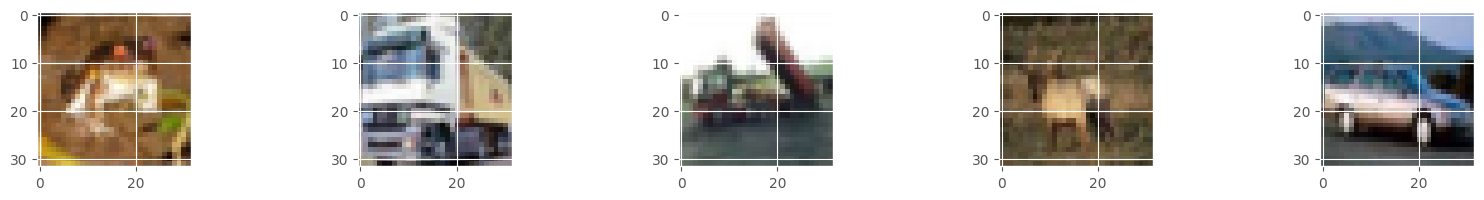

In [ ]:
# Посмотрим на картинки (первые пять)
plt.figure(figsize=(20, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i, :, :])

Как говорится, оцените по соответствующей шкале:



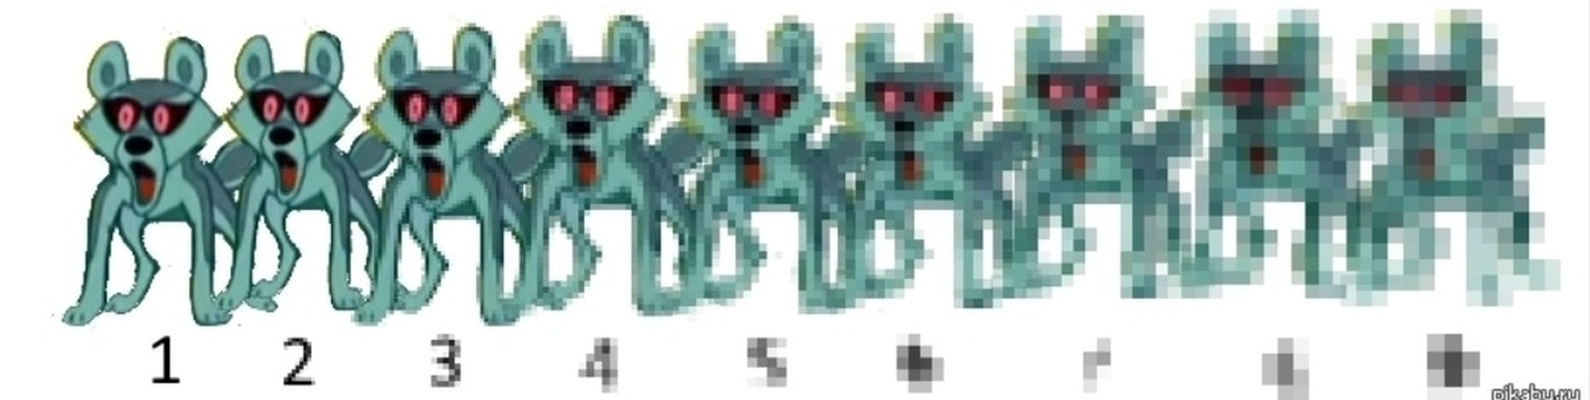

In [ ]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [ ]:
# Настройка размера тензора
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
X_train.shape # (N, C, H, W)

torch.Size([50000, 3, 32, 32])

Количество картинок, количество каналов (для RGB - 3), высота и ширина картинки

## Шаг 1: Построение свёрточной нейронной сети

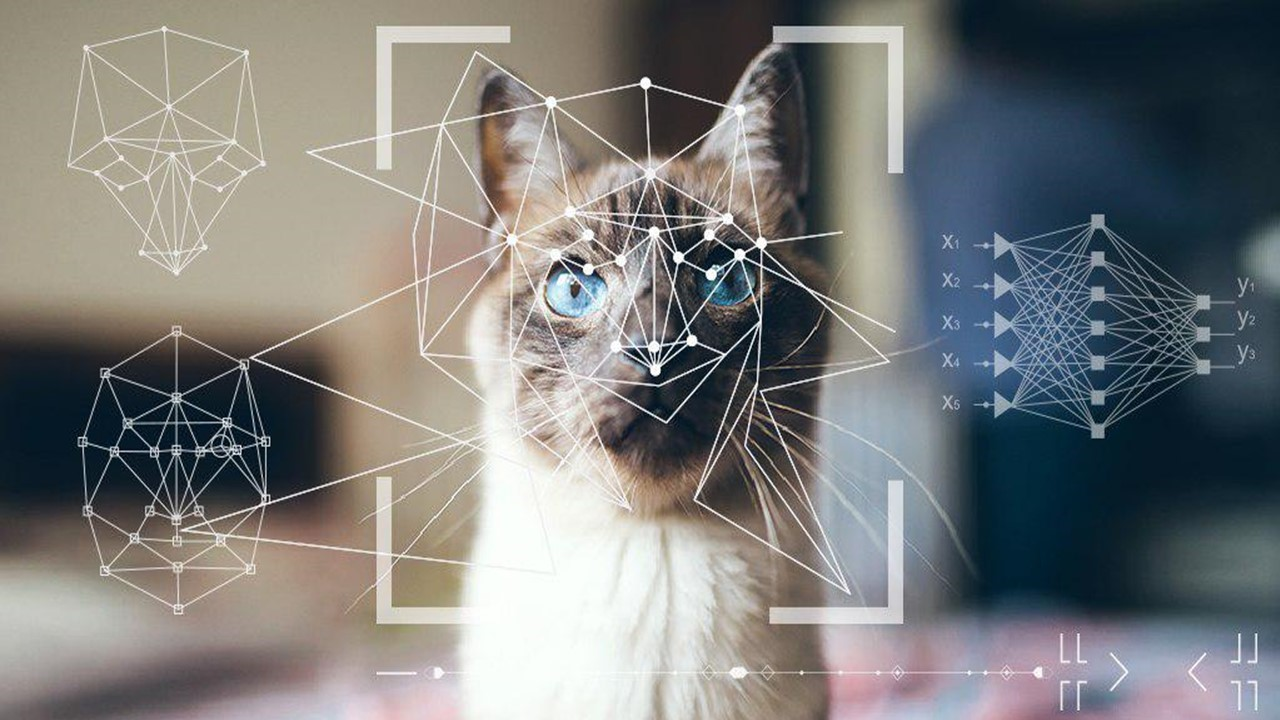

Требуется из этого:

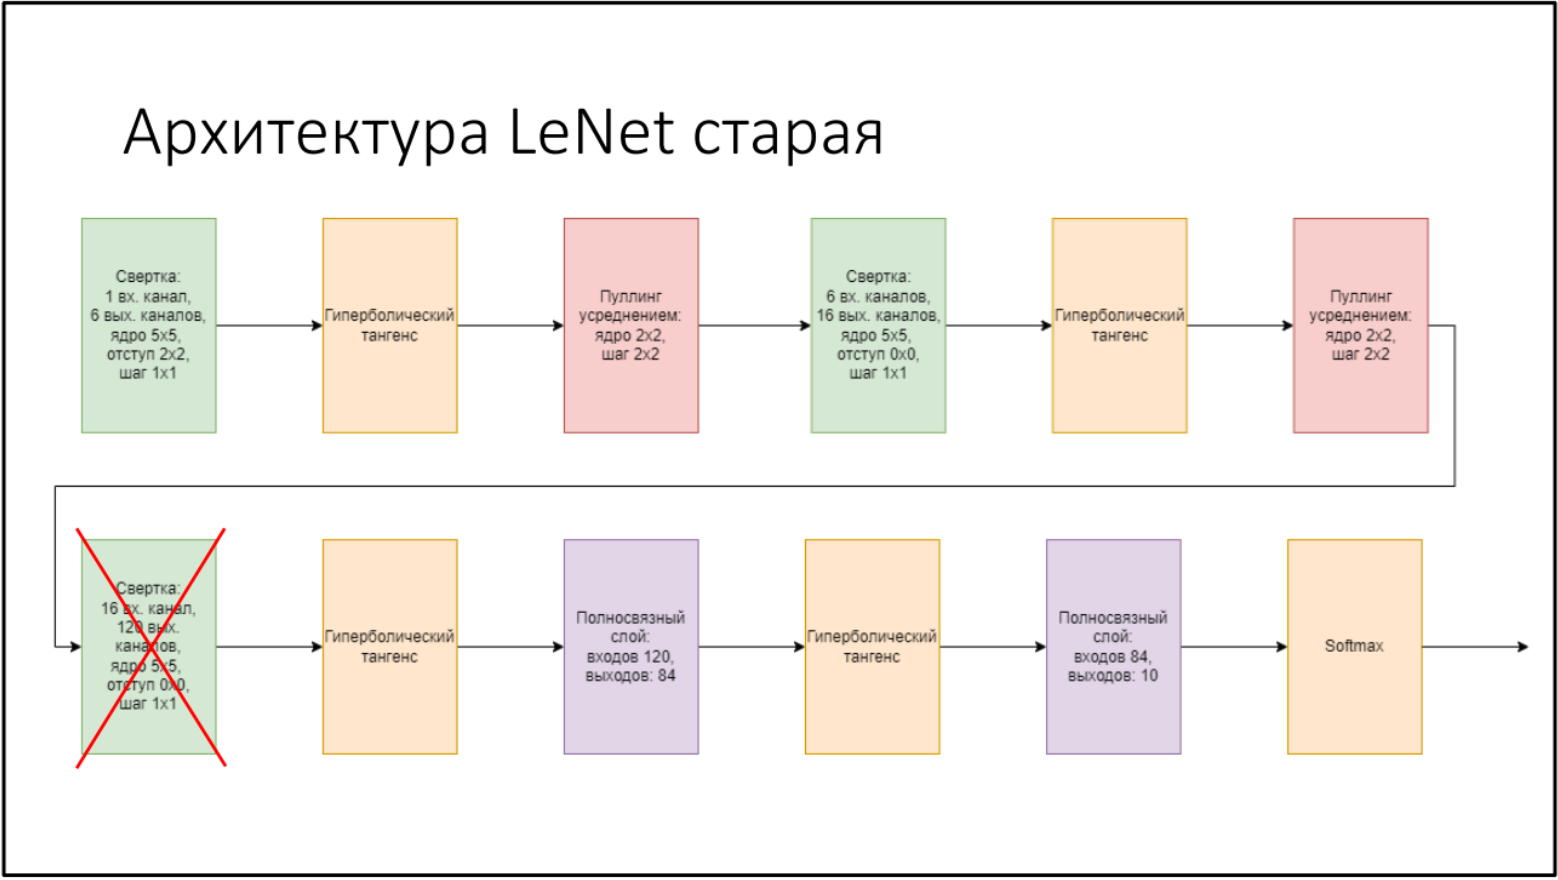

Сделать вот это:

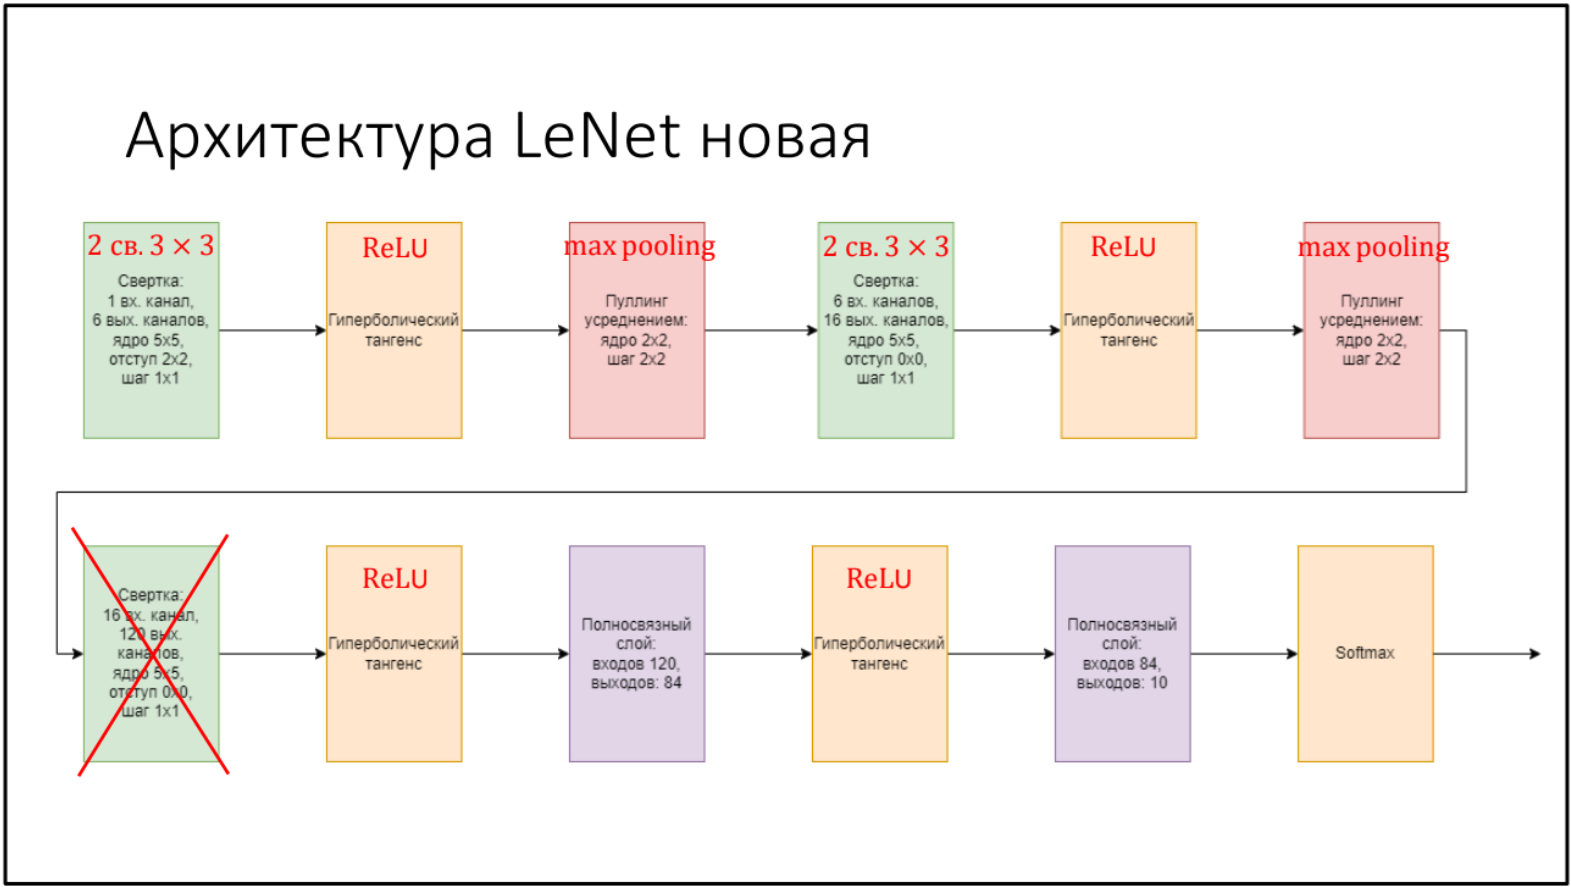

*Зачёркнутый элемент архитектуры использовать опционально*

In [ ]:
class CNNLeNet(tch.nn.Module):
    def __init__(self,
                 activation='tanh',
                 pooling='avg',
                 conv_size=5):
        super(CNNLeNet, self).__init__()

        # АРХИТЕКТУРНЫЕ ПАРАМЕТРЫ:

        # задаём размер свёртки
        self.conv_size = conv_size

        # выбор функции активации
        if activation == 'tanh':
            activation_function = tch.nn.Tanh()
        elif activation == 'relu':
            activation_function  = tch.nn.ReLU()
        else:
            raise NotImplementedError

        # выбор пуллинга
        if pooling == 'avg':
            pooling_layer = tch.nn.AvgPool2d(kernel_size=2, stride=2)
        elif pooling == 'max':
            pooling_layer  = tch.nn.MaxPool2d(kernel_size=2, stride=2)
        else:
            raise NotImplementedError

        # АРХИТЕКТУРА CNN LeNet:

        # выбор 1 свёртки
        if conv_size == 5:
            self.conv1 = tch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv1_1 = tch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=0)
            self.conv1_2 = tch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act1 = activation_function

        self.pool1 = pooling_layer

        # выбор 2 свёртки
        if conv_size == 5:
            self.conv2 = self.conv2 = tch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv2_1 = tch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0)
            self.conv2_2 = tch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act2 = activation_function

        self.pool2 = pooling_layer

        self.fc1 = tch.nn.Linear(5 * 5 * 16, 120) # замена свёртки в архитектуре

        self.act3 = activation_function

        self.fc2 = tch.nn.Linear(120, 84)

        self.act4 = activation_function

        self.fc3 = tch.nn.Linear(84, 10)


    def forward(self, x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))

        x = self.act1(x)

        x = self.pool1(x)

        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))

        x = self.act2(x)

        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)

        x = self.act3(x)

        x = self.fc2(x)

        x = self.act4(x)

        x = self.fc3(x)

        return x

## Шаг 2: Обучение


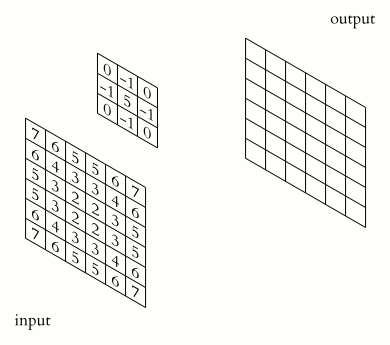

In [ ]:
def train(net, X_train, y_train, X_test, y_test):
    loss = tch.nn.CrossEntropyLoss() # функция потерь
    optimizer = tch.optim.Adam(net.parameters(), lr=0.001) # оптимизатор

    batch_size = 150 # размер батча (пакета)
    epochs = 20 #число эпох

    test_loss_history = [] # значения для функции потерь

    for epoch in range(epochs):
        order = np.random.permutation(len(X_train)) # индексы объектов, отвечает
                                                    # за порядок элементов
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad() # делаем, чтоб не добавлял градиенты с прошлой
                                  # итерации
            net.train()

            batch_indexes = order[start_index:start_index + batch_size]

            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward() # обратный проход: вычисляем градиенты для
                                  # обновления весов

            optimizer.step() # обновление весов

        net.eval()
        test_preds = net.forward(X_test)
        print(f'Эпоха №{epoch + 1}: loss = {loss(test_preds, y_test).data.cpu()}')
        test_loss_history.append(loss(test_preds, y_test).data.cpu())

    del net

    return test_loss_history


In [ ]:
# Словарь, хранящий значения функции потерь для каждой из настроек CNN
loss_dict = {}

In [ ]:
# Лоссы для исходного ЛеНета
loss_dict['tanh'] = train(CNNLeNet(activation='tanh', conv_size=5),
                                            X_train,
                                            y_train,
                                            X_test,
                                            y_test)

Эпоха №1: loss = 1.7343509197235107
Эпоха №2: loss = 1.6165785789489746
Эпоха №3: loss = 1.489537000656128
Эпоха №4: loss = 1.4489928483963013
Эпоха №5: loss = 1.4022419452667236
Эпоха №6: loss = 1.3502271175384521
Эпоха №7: loss = 1.3269531726837158
Эпоха №8: loss = 1.3249294757843018
Эпоха №9: loss = 1.320656657218933
Эпоха №10: loss = 1.2900586128234863
Эпоха №11: loss = 1.294433355331421
Эпоха №12: loss = 1.2796576023101807
Эпоха №13: loss = 1.2697806358337402
Эпоха №14: loss = 1.2660249471664429
Эпоха №15: loss = 1.2603973150253296
Эпоха №16: loss = 1.267012596130371
Эпоха №17: loss = 1.2586911916732788
Эпоха №18: loss = 1.2750365734100342
Эпоха №19: loss = 1.2710031270980835
Эпоха №20: loss = 1.2741278409957886


In [ ]:
# Лоссы для ЛеНета с функцией активации ReLu
loss_dict['relu'] = train(CNNLeNet(activation='relu', conv_size=5),
                                            X_train,
                                            y_train,
                                            X_test,
                                            y_test)

Эпоха №1: loss = 1.703707218170166
Эпоха №2: loss = 1.5736812353134155
Эпоха №3: loss = 1.4801536798477173
Эпоха №4: loss = 1.4374667406082153
Эпоха №5: loss = 1.41361665725708
Эпоха №6: loss = 1.380144476890564
Эпоха №7: loss = 1.3678019046783447
Эпоха №8: loss = 1.320275902748108
Эпоха №9: loss = 1.3234341144561768
Эпоха №10: loss = 1.292256236076355
Эпоха №11: loss = 1.2816665172576904
Эпоха №12: loss = 1.2757000923156738
Эпоха №13: loss = 1.2579878568649292
Эпоха №14: loss = 1.2822004556655884
Эпоха №15: loss = 1.2338356971740723
Эпоха №16: loss = 1.2334834337234497
Эпоха №17: loss = 1.2195732593536377
Эпоха №18: loss = 1.2230783700942993
Эпоха №19: loss = 1.2263171672821045
Эпоха №20: loss = 1.2108020782470703


In [ ]:
# Лоссы для ЛеНета с функцией активации ReLu, макс пуллингом
loss_dict['relu_max_pool'] = train(CNNLeNet(activation='relu', conv_size=5, pooling='max'),
                                                                  X_train,
                                                                  y_train,
                                                                  X_test,
                                                                  y_test)

Эпоха №1: loss = 1.6612740755081177
Эпоха №2: loss = 1.5199472904205322
Эпоха №3: loss = 1.4656579494476318
Эпоха №4: loss = 1.3912962675094604
Эпоха №5: loss = 1.3647170066833496
Эпоха №6: loss = 1.3365830183029175
Эпоха №7: loss = 1.2827080488204956
Эпоха №8: loss = 1.2676643133163452
Эпоха №9: loss = 1.2364774942398071
Эпоха №10: loss = 1.2252317667007446
Эпоха №11: loss = 1.2145259380340576
Эпоха №12: loss = 1.1842374801635742
Эпоха №13: loss = 1.1757842302322388
Эпоха №14: loss = 1.1558873653411865
Эпоха №15: loss = 1.1730830669403076
Эпоха №16: loss = 1.1430102586746216
Эпоха №17: loss = 1.1690188646316528
Эпоха №18: loss = 1.123990774154663
Эпоха №19: loss = 1.1226255893707275
Эпоха №20: loss = 1.1140117645263672


In [ ]:
# Лоссы для ЛеНета с функцией активации ReLu, макс пуллингом, двумя свёртками 3х3
loss_dict['relu_max_pool_3x3'] = train(CNNLeNet(activation='relu', conv_size=3, pooling='max'),
                                                X_train,
                                                y_train,
                                                X_test,
                                                y_test)

Эпоха №1: loss = 1.810953140258789
Эпоха №2: loss = 1.5372744798660278
Эпоха №3: loss = 1.471156120300293
Эпоха №4: loss = 1.343510627746582
Эпоха №5: loss = 1.3109780550003052
Эпоха №6: loss = 1.254899501800537
Эпоха №7: loss = 1.275422215461731
Эпоха №8: loss = 1.2167752981185913
Эпоха №9: loss = 1.2102715969085693
Эпоха №10: loss = 1.1899958848953247
Эпоха №11: loss = 1.1636008024215698
Эпоха №12: loss = 1.1442679166793823
Эпоха №13: loss = 1.1528104543685913
Эпоха №14: loss = 1.1284891366958618
Эпоха №15: loss = 1.1171976327896118
Эпоха №16: loss = 1.1007434129714966
Эпоха №17: loss = 1.1340563297271729
Эпоха №18: loss = 1.097957730293274
Эпоха №19: loss = 1.1073981523513794
Эпоха №20: loss = 1.0993940830230713


## Шаг 3: Визуализация результатов



Text(0, 0.5, 'loss value')

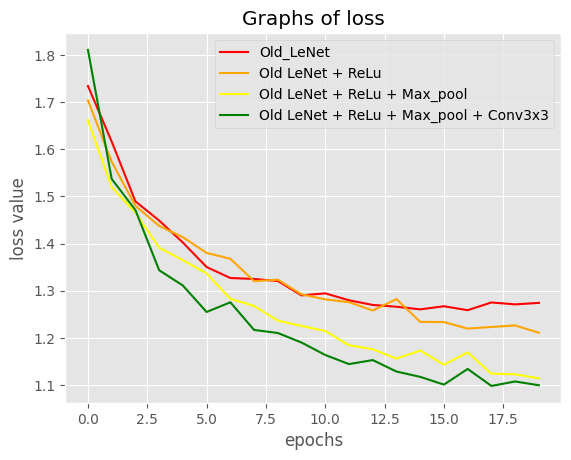

In [ ]:
plt.title('Graphs of loss')
plt.plot(loss_dict['tanh'], label='Old_LeNet', c='red')
plt.plot(loss_dict['relu'], label='Old LeNet + ReLu', c='orange')
plt.plot(loss_dict['relu_max_pool'], label='Old LeNet + ReLu + Max_pool', c='yellow')
plt.plot(loss_dict['relu_max_pool_3x3'], label='Old LeNet + ReLu + Max_pool + Conv3x3', c='green')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss value')